In [1]:
import networkx as nx
from datetime import datetime

import numpy as np
import warnings
#from custom import load_data as cf
from urllib.request import urlretrieve
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
import os
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
def get_fremont_data(filename='Fremont.csv' , url=URL ,force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
    data = pd.read_csv('Freemont.csv',index_col='Date', parse_dates=True)
    data.columns =['East','West']
    data['Total'] =data['West'] + data['East']
    return data



In [4]:
%%time
data = get_fremont_data()
data.head()

Wall time: 5.95 s


In [5]:
%timeit




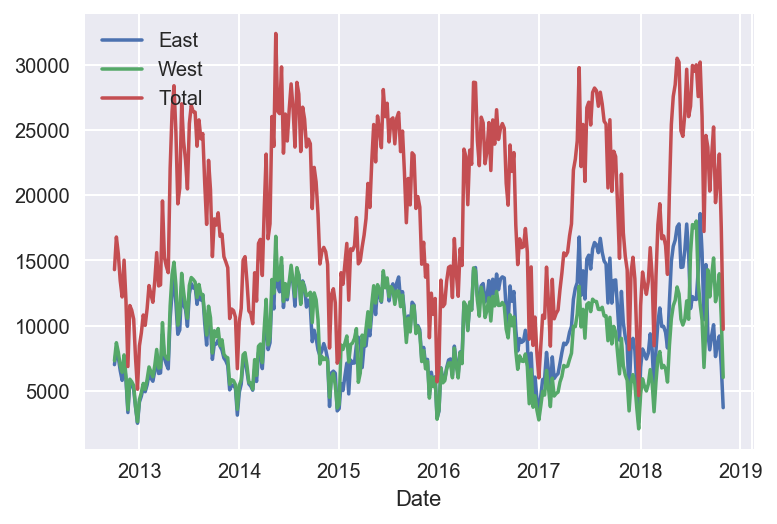

In [7]:
data.resample('W').sum().plot()

(0, 1080850.45)

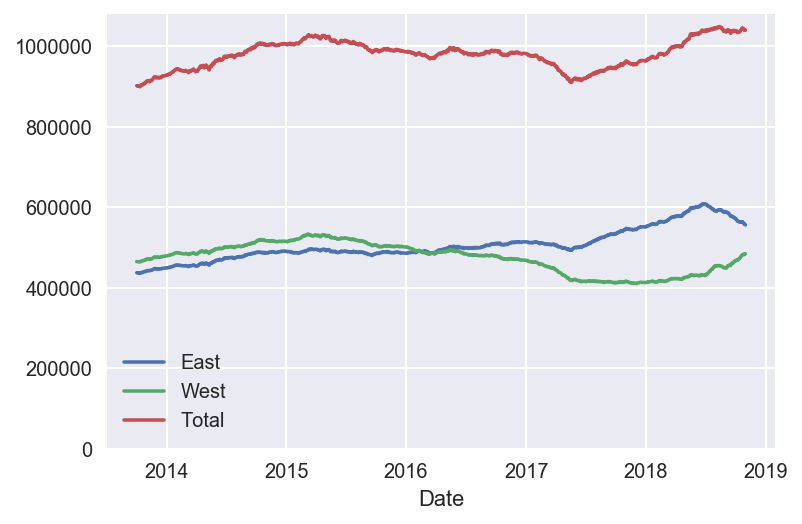

In [8]:

# %%timeit

ax=data.resample('D').sum().rolling(365).sum().plot()

ax.set_ylim(0,None)

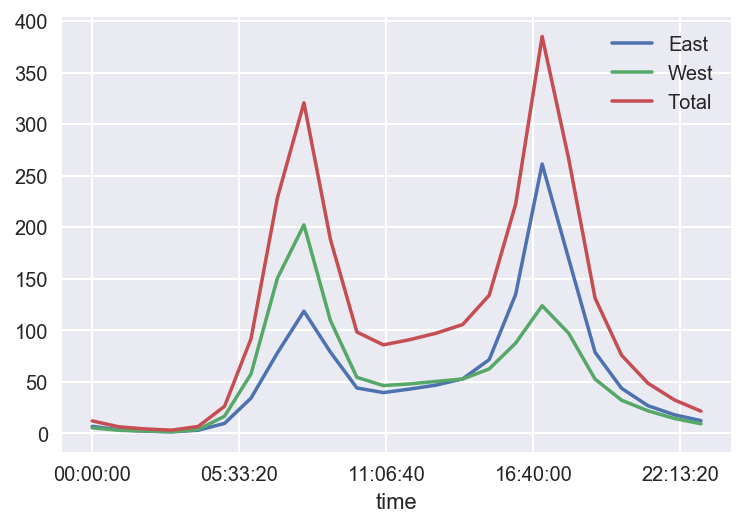

In [9]:
data.groupby(data.index.time).mean().plot()

In [10]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[ :5 , :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


Wall time: 4.21 s


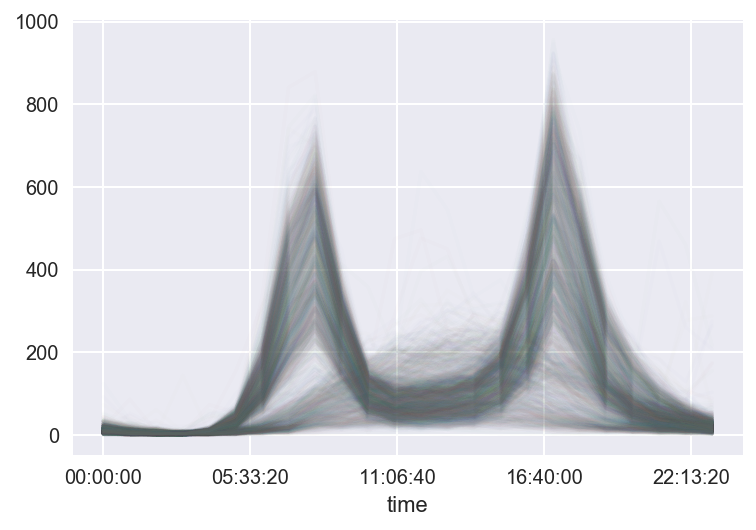

In [11]:
%%time
pivoted.plot(legend=False, alpha=0.01)
